In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
from numba import njit
from LatexConstants import *

In [2]:
@njit
def FermiDirac(x, max, thalf, slope, shift):
    return (max/(1+np.exp(-(x-thalf)/slope))) + shift

In [3]:
x = [12.154696132596685, 36.46408839779006, 61.87845303867404, 87.29281767955801, 112.707182320442, 135.91160220994476, 162.43093922651934, 187.84530386740332, 213.25966850828732, 237.5690607734807, 262.98342541436466, 287.292817679558, 312.70718232044203, 335.91160220994476, 362.43093922651934, 386.7403314917127, 411.0497237569061, 436.4640883977901, 460.77348066298345, 487.292817679558, 510.4972375690608, 535.9116022099448, 561.3259668508288, 586.7403314917127, 611.0497237569061, 636.4640883977901, 662.9834254143647]
apv_signal = [4.8076923076923075, -33.65384615384615, -55.28846153846153, -26.44230769230769, -7.211538461538462, 21.634615384615383, 62.5, 213.94230769230768, 432.6923076923077, 617.7884615384615, 752.4038461538461, 858.1730769230769, 877.4038461538461, 872.5961538461538, 762.0192307692307, 617.7884615384615, 461.53846153846155, 278.8461538461538, 165.8653846153846, 120.1923076923077, 55.28846153846153, 38.46153846153846, 9.615384615384615, -7.211538461538462, -16.826923076923077, -28.846153846153847, -43.26923076923077]

In [ ]:
bin = 25
nbins = 27
maxindex = np.argmax(apv_signal)
apv_times = np.arange(0+(0.5*bin), bin*nbins+(0.5*bin), bin)
# q_error = np.repeat(config['apv']['charge_error'], len(apv_signal))


bounds = ((1, 1, 1, -10),(3000,1000,100,200))
par,cov = curve_fit(FermiDirac, apv_times[0:maxindex], apv_signal[0:maxindex], p0=(apv_signal[maxindex], maxindex, 50, 0), bounds=bounds)
t = par[1]
err_t = np.sqrt(cov[1][1]) 

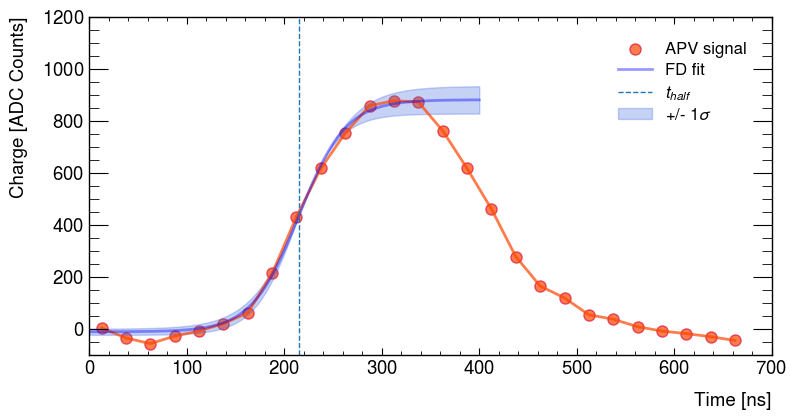

In [6]:
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(1.5*textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
plt.plot(apv_times,apv_signal, alpha = 0.7, color = 'orangered')
plt.scatter(apv_times,apv_signal, alpha = 0.7, color = 'orangered', label = 'APV signal', edgecolors='crimson')
plt.xlabel(f"Time [ns]", fontsize = 0.9*fontsize)
plt.ylabel(f"Charge [ADC Counts]", fontsize = 0.9*fontsize)
# plt.vlines(t,0, 1000, color = 'darkgrey', lw = 2)
# plt.axvspan(t-err_t, t+err_t, alpha = 0.5)
plt.ylim(-100, 1200)
plt.xlim(0, 700)
# times = np.linspace(0, x[np.argmax(y)], 1000)
times = np.linspace(0, 400, 1000)
upper = [par[i] + np.sqrt(cov[i][i]) for i in range(len(par))]
lower = [par[i] - np.sqrt(cov[i][i]) for i in range(len(par))]
plt.plot(times, FermiDirac(times, *par), color = 'blue',lw = 2, alpha = 0.4, label  = 'FD fit') 
plt.vlines(t, -100, 1200, label = r'$t_{half}$', linestyles='dashed', lw = 1)
# plt.vlines(t+err_t, -100, 1200)
# plt.plot(times, FermiDirac(times, *upper), color = 'red',lw = 2, alpha = 0.5) 
# plt.plot(times, FermiDirac(times, *lower), color = 'red',lw = 2, alpha = 0.5)
plt.fill_between(times, FermiDirac(times, *lower), FermiDirac(times, *upper), color = 'royalblue', alpha = 0.3, label = r'+/- 1$\sigma$')   
# plt.grid(alpha = 0.4) 
plt.tick_params(axis='both', which='major', labelsize=0.9*fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
plt.legend(fontsize = 0.8*fontsize)
plt.tight_layout()
# plt.savefig('../ThesisPlots/FittedAPVSignal.pdf', dpi  = 600, transparent = True)
# plt.savefig('../ThesisPlots/FittedAPVSignal.png', dpi = 600, transparent = True)
plt.show()  